In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/rajugc/imdb-top-250-movies-dataset'

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\imdb-top-250-movies-dataset" (use force=True to force download)


In [4]:
data_dir = './imdb-top-250-movies-dataset'

In [5]:
import os
file_list = os.listdir(data_dir)

In [6]:
!pip install pandas --upgrade --quiet

In [7]:
import pandas as pd

C:\Users\yagde\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [8]:
movies_df=pd.read_csv(f"{data_dir}/{file_list.pop()}")

In [9]:
#First, let's examine the df
movies_df

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama,PG-13,2h 26m,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett"
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,2h 22m,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev"
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,1h 30m,Wish granted! (DVD re-release),Not Available,Not Available,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott"
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,3h 11m,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley


In [10]:
movies_df.info(),movies_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


(None,
 Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
        'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers'],
       dtype='object'))

In [11]:
#Let's select a subset of columns with the relevant data for our analysis.
selected_columns=['name','year','rating','genre','run_time','budget','box_office','directors']

In [12]:
len(selected_columns)

8

In [13]:
#Let's extract a copy of the data from these columns into a new data frame
my_movies_df=movies_df[selected_columns].copy()

In [14]:
my_movies_df.info(),my_movies_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        250 non-null    object 
 1   year        250 non-null    int64  
 2   rating      250 non-null    float64
 3   genre       250 non-null    object 
 4   run_time    250 non-null    object 
 5   budget      250 non-null    object 
 6   box_office  250 non-null    object 
 7   directors   250 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.8+ KB


(None, (250, 8))

In [15]:
#To make our analysis easier, let's convert the non-num other columns into numeric data types while ignoring any
#non-numeric value.The non-numeric are converted to NaN.
my_movies_df['budget']=pd.to_numeric(my_movies_df.budget,errors='coerce')
my_movies_df['box_office']=pd.to_numeric(my_movies_df.box_office,errors='coerce')

In [16]:
my_movies_df.describe(),my_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        250 non-null    object 
 1   year        250 non-null    int64  
 2   rating      250 non-null    float64
 3   genre       250 non-null    object 
 4   run_time    250 non-null    object 
 5   budget      206 non-null    float64
 6   box_office  217 non-null    float64
 7   directors   250 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 15.8+ KB


(              year      rating        budget    box_office
 count   250.000000  250.000000  2.060000e+02  2.170000e+02
 mean   1986.360000    8.307200  5.291227e+07  2.382076e+08
 std      25.125356    0.229081  1.778697e+08  3.825392e+08
 min    1921.000000    8.000000  1.330000e+05  6.700000e+01
 25%    1966.250000    8.100000  3.000000e+06  8.574081e+06
 50%    1994.000000    8.200000  1.500000e+07  7.403672e+07
 75%    2006.000000    8.400000  5.100000e+07  3.217527e+08
 max    2022.000000    9.300000  2.400000e+09  2.799439e+09, None)

In [17]:
#let's round up a bit the columns
my_movies_df['year']=round(my_movies_df['year'],0)
my_movies_df['budget']=round(my_movies_df['budget'],0)
my_movies_df['rating']=round(my_movies_df['rating'],1)

In [18]:
my_movies_df.describe(),my_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        250 non-null    object 
 1   year        250 non-null    int64  
 2   rating      250 non-null    float64
 3   genre       250 non-null    object 
 4   run_time    250 non-null    object 
 5   budget      206 non-null    float64
 6   box_office  217 non-null    float64
 7   directors   250 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 15.8+ KB


(              year      rating        budget    box_office
 count   250.000000  250.000000  2.060000e+02  2.170000e+02
 mean   1986.360000    8.307200  5.291227e+07  2.382076e+08
 std      25.125356    0.229081  1.778697e+08  3.825392e+08
 min    1921.000000    8.000000  1.330000e+05  6.700000e+01
 25%    1966.250000    8.100000  3.000000e+06  8.574081e+06
 50%    1994.000000    8.200000  1.500000e+07  7.403672e+07
 75%    2006.000000    8.400000  5.100000e+07  3.217527e+08
 max    2022.000000    9.300000  2.400000e+09  2.799439e+09, None)

In [28]:
#Next, let's filter a bit the genre and directoes series
my_movies_df['genre'].value_counts().head(13)

Drama                         19
Crime,Drama                   14
Animation,Adventure,Comedy    10
Biography,Drama,History        9
Crime,Drama,Mystery            9
Drama,War                      8
Drama,Romance                  6
Crime,Drama,Thriller           5
Action,Crime,Drama             5
Action,Adventure,Drama         5
Action,Adventure,Sci-Fi        5
Action,Adventure,Fantasy       5
Animation,Action,Adventure     5
Name: genre, dtype: int64

In [47]:
my_movies_df['directors'].value_counts().head(19)

Martin Scorsese         7
Christopher Nolan       7
Steven Spielberg        7
Stanley Kubrick         7
Akira Kurosawa          7
Alfred Hitchcock        6
Billy Wilder            5
Charles Chaplin         5
Quentin Tarantino       5
Hayao Miyazaki          4
Sergio Leone            4
Francis Ford Coppola    3
Frank Capra             3
David Fincher           3
Ridley Scott            3
Ingmar Bergman          3
Clint Eastwood          3
Peter Jackson           3
James Cameron           3
Name: directors, dtype: int64

In [48]:
#Exploratory Analysis and Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
#let's see how many movies came out the last 50 years
last_50_years_movies=my_movies_df[(my_movies_df['year']>=1972) & (my_movies_df['year']<=2022)]
sorted_last_50_years_movies=last_50_years_movies.sort_values('year',ascending=False)
sorted_last_50_years_movies
#I created a new table, let's check if it's a DataFrame

,name,year,rating,genre,run_time,budget,box_office,directors
105,Top Gun: Maverick,2022,8.3,"Action,Drama",2h 10m,170000000.0,1.488733e+09,Joseph Kosinski
233,Jai Bhim,2021,8.8,"Crime,Drama,Mystery",2h 44m,NaN,NaN,T.J. Gnanavel
149,Spider-Man: No Way Home,2021,8.2,"Action,Adventure,Fantasy",2h 28m,200000000.0,1.921847e+09,Jon Watts
129,The Father,2020,8.2,"Drama,Mystery",1h 37m,6000000.0,2.442716e+07,Florian Zeller
107,Hamilton,2020,8.4,"Biography,Drama,History",2h 40m,NaN,NaN,Thomas Kail
...,...,...,...,...,...,...,...,...
155,Chinatown,1974,8.2,"Drama,Mystery,Thriller",2h 10m,6000000.0,2.922594e+07,Roman Polanski
3,The Godfather Part II,1974,9.0,"Crime,Drama",3h 22m,13000000.0,4.796192e+07,Francis Ford Coppola
225,The Exorcist,1973,8.1,Horror,2h 2m,11000000.0,4.413061e+08,William Friedkin
111,The Sting,1973,8.3,"Comedy,Crime,Drama",2h 9m,5500000.0,1.560000e+08,George Roy Hill


In [200]:
#I created a new table, let's check if it's a DataFrame
if type(sorted_last_50_years_movies)==pd.core.frame.DataFrame:
    print('sorted_last_50_years_movies is a df')
else:
    print('sorted_last_50_years_movies id not a df')

sorted_last_50_years_movies is a df


In [207]:
movies_by_year = sorted_last_50_years_movies.groupby('year')['name'].count()
movies_by_year = pd.DataFrame(movies_by_year).reset_index().rename(columns={'year': 'Year Released', 'name': 'Number of Movies'})
movies_by_year

,Year Released,Number of Movies
0,1972,1
1,1973,2
2,1974,2
3,1975,5
4,1976,3
5,1977,1
6,1978,1
7,1979,3
8,1980,4
9,1981,2


C:\Users\yagde\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


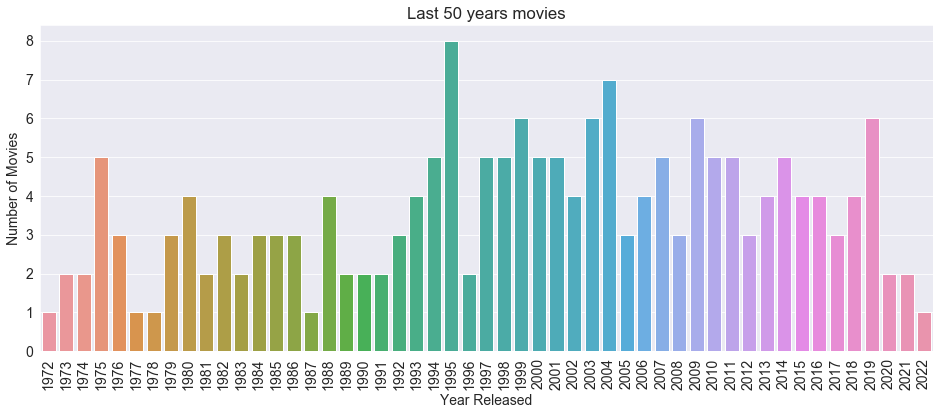

In [208]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.title('Last 50 years movies')
plt.ylabel('Amount')
sns.barplot(movies_by_year['Year Released'],movies_by_year['Number of Movies']);
#The lines cutting each bar represent the amount of variation in the values

In [209]:
# It's obvious to see that in 1995 the amount of movies that were released was the highest. 
# Only in 2004, the amount of movies released were close to 1995 amount. 
# We can see a substantional decrease in films in 2020, probably because of Covid-19 that affected the whole world. 

In [234]:
# let's explore the connection between the movies that were released in 2004 & 1995 
movies_1995_2004=last_50_years_movies.loc[(last_50_years_movies['year'] == 1995)|(last_50_years_movies['year'] == 2004)]
movies_1995_2004.sort_values('year',ascending=False)

,name,year,rating,genre,run_time,budget,box_office,directors
89,Eternal Sunshine of the Spotless Mind,2004,8.3,"Drama,Romance,Sci-Fi",1h 48m,20000000.0,74036715.0,Michel Gondry
123,Downfall,2004,8.2,"Biography,Drama,History",2h 36m,13500000.0,92181574.0,Oliver Hirschbiegel
163,Howl's Moving Castle,2004,8.2,"Animation,Adventure,Family",1h 59m,24000000.0,237536126.0,Hayao Miyazaki
173,Million Dollar Baby,2004,8.1,"Drama,Sport",2h 12m,30000000.0,216763646.0,Clint Eastwood
208,Hotel Rwanda,2004,8.1,"Biography,Drama,History",2h 1m,17500000.0,33882243.0,Terry George
220,Before Sunset,2004,8.1,"Drama,Romance",1h 20m,NaN,NaN,Richard Linklater
226,The Incredibles,2004,8.0,"Animation,Action,Adventure",1h 55m,92000000.0,631607053.0,Brad Bird
18,Se7en,1995,8.6,"Crime,Drama,Mystery",2h 7m,33000000.0,327333559.0,David Fincher
39,The Usual Suspects,1995,8.5,"Crime,Drama,Mystery",1h 46m,6000000.0,23341568.0,Bryan Singer
73,Toy Story,1995,8.3,"Animation,Adventure,Comedy",1h 21m,30000000.0,394436586.0,John Lasseter


In [237]:
connection_1995_2004 = movies_1995_2004.groupby('year')['rating','budget','box_office'].mean()
connection_1995_2004 = pd.DataFrame(connection_1995_2004).reset_index().rename(columns={'year': 'Year', 'rating': 'rating','budget': 'budget','box_office': 'box_office'})
connection_1995_2004

C:\Users\yagde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Year,rating,budget,box_office
0,1995,8.312500,3.650000e+07,1.811235e+08
1,2004,8.142857,3.283333e+07,2.143346e+08


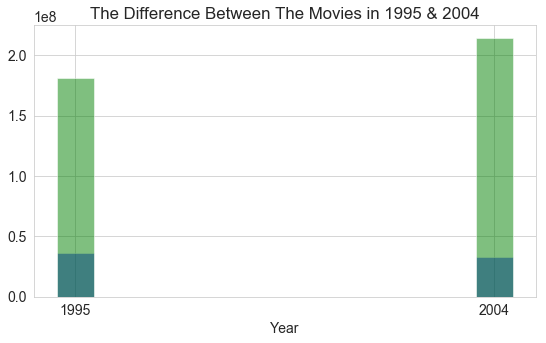

In [282]:
sns.set_style('whitegrid')
plt.title('The Difference Between The Movies in 1995 & 2004')
plt.xlabel('Year')
plt.xticks(connection_1995_2004['Year'],connection_1995_2004['Year'])
plt.bar(connection_1995_2004['Year'],connection_1995_2004['budget'],color = 'blue',alpha=0.5, label='budget')
plt.bar(connection_1995_2004['Year'],connection_1995_2004['box_office'],color = 'green',alpha=0.5, label='box office');

In [283]:
# We can see that the box_office in 1995 was higher than in 2004, but as for the budget- in 2004 it was higher.
# it seems that higher budget for a film dosent guarantee higher box_office numbers for a movie. 

In [378]:
# our next examination will be on the genre sector. 
genre_movies_df=my_movies_df[['genre','year']]
genre_chart_count=genre_movies_df['genre'].value_counts()
genre_table=genre_chart_count.head(15)
genre_table=pd.DataFrame(genre_table).reset_index().rename(columns={'genre':'Genre'})
genre_table['index']=genre_table['index'].astype('string')
genre_table

,index,Genre
0,Drama,19
1,"Crime,Drama",14
2,"Animation,Adventure,Comedy",10
3,"Biography,Drama,History",9
4,"Crime,Drama,Mystery",9
5,"Drama,War",8
6,"Drama,Romance",6
7,"Crime,Drama,Thriller",5
8,"Action,Crime,Drama",5
9,"Action,Adventure,Drama",5


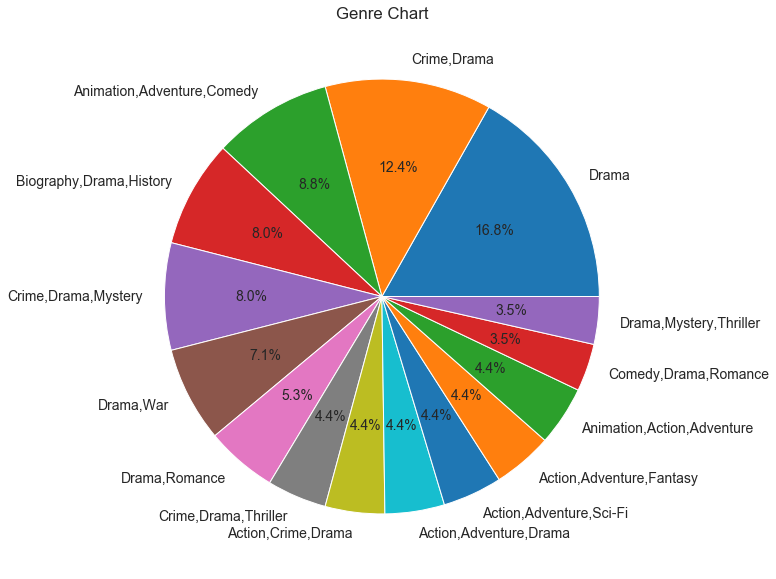

In [376]:
plt.figure(figsize=(12,10))
plt.title('Genre Chart')
plt.pie(genre_table['Genre'],labels=genre_table['index'],autopct='%1.1f%%');

In [379]:
# We took 15 movies from the my_movies_df randomaly just to see what is the genre distribution.
# As we can see, the genre 'Drama' takes 16.8%, the 'Crime,Drama' takes 12.4% and everyone else is below. 
# Maybe people love Drama more than we acknowledge. 

In [383]:
#Now, let's look at the list of our directors.
my_movies_df['directors'].value_counts().head(19)

Martin Scorsese         7
Christopher Nolan       7
Steven Spielberg        7
Stanley Kubrick         7
Akira Kurosawa          7
Alfred Hitchcock        6
Billy Wilder            5
Charles Chaplin         5
Quentin Tarantino       5
Hayao Miyazaki          4
Sergio Leone            4
Francis Ford Coppola    3
Frank Capra             3
David Fincher           3
Ridley Scott            3
Ingmar Bergman          3
Clint Eastwood          3
Peter Jackson           3
James Cameron           3
Name: directors, dtype: int64

In [402]:
directors_movies_df = my_movies_df.groupby('directors')['name','budget','box_office'].sum()
director_chart=directors_movies_df.sort_values('budget',ascending=False).head(20)
director_chart=pd.DataFrame(director_chart).reset_index().rename(columns={'directors':'directors name'})
director_chart

C:\Users\yagde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,directors name,budget,box_office
0,Hayao Miyazaki,2.443000e+09,7.633643e+08
1,Christopher Nolan,9.590000e+08,4.221516e+09
2,"Anthony Russo,Joe Russo",6.770000e+08,4.851854e+09
3,Rajkumar Hirani,5.500000e+08,6.026284e+07
4,Martin Scorsese,3.663000e+08,1.208287e+09
5,Peter Jackson,2.810000e+08,2.992606e+09
6,Steven Spielberg,2.280000e+08,3.254923e+09
7,Quentin Tarantino,2.092000e+08,1.145281e+09
8,Jon Watts,2.000000e+08,1.921847e+09
9,Lee Unkrich,2.000000e+08,1.067316e+09


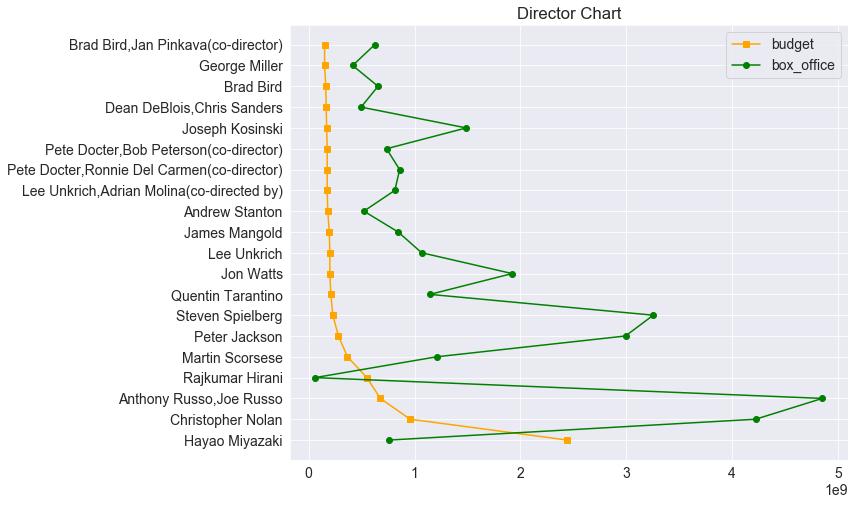

In [425]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.plot(director_chart['budget'],director_chart['directors name'],marker='s', c='orange', ls='-')
plt.plot(director_chart['box_office'],director_chart['directors name'],marker='o', c='green', ls='-')
plt.title('Director Chart')
plt.legend(['budget','box_office']) ; 

In [426]:
#We can see that the most directors are successeing in making a movie good enough for the box_office to pass the budget. 
# the 2 exceptions are Rajkumar Hirani and Hayao Miyazaki. 

In [427]:
#Asking and Answering Questions